# Trust as a Mediator: Data Exploration

- Project: Urban-Rural Residence, Social Trust, and Poltical Tolerance
- Author: Nicole Lucas
- Date: December 2025 
- Description: Initial exploration of General Social Survey (GSS) data 



### Table of Contents 
1. Setup and Configuration
2. Data Loading
3. Initial Data Inspection
4. Variable Exploration
   
   4.1 Dependent Variable: Political Tolerance
   
   4.2 Mediator: Social Trust
   
   4.3 Independent Variable: Urbanicity
   
   4.4 Control Variables
   
6. Missing Data Analysis
7. Data Quality Checks
8. Key Takeaways and Next Steps

## Setup and Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

np.random.seed(42)

print("Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully!
Pandas version: 1.5.3
NumPy version: 1.23.5


## Data Loading

In [2]:
data_path = "raw_data_gss/gss_raw_data_poltol.csv"

try:
    df_raw = pd.read_csv(data_path, low_memory=False)
    print(f"Data loaded successfully!")
    print(f"  - Shape: {df_raw.shape}")
    print(f"  - Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except FileNotFoundError:
    print("Error: Data file not found. Please check the path.")
    print(f"  Expected location: {data_path}")

Data loaded successfully!
  - Shape: (22656, 38)
  - Memory usage: 55.78 MB


**Data Source Information:**
- **Source:** General Social Survey (GSS), NORC at the University of Chicago
- **Download Date:** November 2025
- **Years Included:** 2010-2024
- **Access:** https://gssdataexplorer.norc.org/

## Initial Data Inspection

In [3]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDimensions: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")
print(f"Time period: {df_raw['year'].min()} - {df_raw['year'].max()}")
print(f"\nColumn types:")
print(df_raw.dtypes.value_counts())

DATASET OVERVIEW

Dimensions: 22,656 rows × 38 columns
Time period: 2010 - 2024

Column types:
object     35
int64       2
float64     1
dtype: int64


#### First Look at the Data

In [24]:
print("\n" + "="*80)
print("FIRST 5 ROWS")
print("="*80)
df_raw.head()


FIRST 5 ROWS


,year,id_,age,educ,degree,sex,race,income,rincome,region,xnorcsiz,srcbelt,partyid,polviews,spkath,colath,libath,spkrac,colrac,librac,spkcom,colcom,libcom,colmil,libmil,spkhomo,colhomo,libhomo,spkmslm,colmslm,libmslm,helpful,fair,trust,partyid1,hispanic,ballot,wtss
0,2010,1,31,4 years of college,Bachelor's,MALE,Other,"$25,000 or more",$25000 OR MORE,Northeast,"A large central city (over 250,000)",Central city of 12 largest smsas,Not very strong democrat,Slightly liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Looking out for themselves,Depends,Can't be too careful,.i: Inapplicable,"Another Hispanic, Latino, or Spanish origin",Ballot b,0.84
1,2010,2,23,4 years of college,Bachelor's,FEMALE,White,"$15,000 to $19,999",$7000 TO 7999,Northeast,"A large central city (over 250,000)",Central city of 12 largest smsas,Not very strong democrat,Liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Looking out for themselves,Would try to be fair,Most people can be trusted,.i: Inapplicable,Not Hispanic,Ballot b,0.46
2,2010,3,71,8th grade,Less than high school,FEMALE,Black,"$20,000 to $24,999",.i: Inapplicable,Northeast,"A large central city (over 250,000)",Central city of 12 largest smsas,Strong democrat,.d: Do not Know/Cannot Choose,ALLOWED,NOT ALLOWED,.d: Do not Know/Cannot Choose,NOT ALLOWED,NOT ALLOWED,REMOVE,NOT ALLOWED,"Yes, fired",REMOVE,.d: Do not Know/Cannot Choose,.d: Do not Know/Cannot Choose,NOT ALLOWED,ALLOWED,NOT REMOVE,Not allowed,Not allowed,Remove,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,"Another Hispanic, Latino, or Spanish origin",Ballot a,0.46
3,2010,4,82,10th grade,Less than high school,FEMALE,White,"$8,000 to $9,999",.i: Inapplicable,Northeast,"A large central city (over 250,000)",Central city of 12 largest smsas,Strong republican,Liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Looking out for themselves,Would take advantage of you,Can't be too careful,.i: Inapplicable,Puerto Rican,Ballot b,0.46
4,2010,5,78,No formal schooling,Less than high school,FEMALE,Black,.d: Do not Know/Cannot Choose,.i: Inapplicable,Northeast,"A large central city (over 250,000)",Central city of 12 largest smsas,"Independent (neither, no response)",Slightly liberal,NOT ALLOWED,NOT ALLOWED,NOT REMOVE,NOT ALLOWED,NOT ALLOWED,NOT REMOVE,ALLOWED,Not fired,NOT REMOVE,ALLOWED,NOT REMOVE,ALLOWED,ALLOWED,NOT REMOVE,"Yes, allowed",Not allowed,Not remove,Looking out for themselves,Would try to be fair,Can't be too careful,.i: Inapplicable,Not Hispanic,Ballot c,0.93


In [25]:
print("\n" + "="*80)
print("LAST 5 ROWS")
print("="*80)
df_raw.tail()


LAST 5 ROWS


,year,id_,age,educ,degree,sex,race,income,rincome,region,xnorcsiz,srcbelt,partyid,polviews,spkath,colath,libath,spkrac,colrac,librac,spkcom,colcom,libcom,colmil,libmil,spkhomo,colhomo,libhomo,spkmslm,colmslm,libmslm,helpful,fair,trust,partyid1,hispanic,ballot,wtss
22651,2024,3305,84,8 or more years of college,Graduate,MALE,White,"$4,000 to $4,999",$4000 TO 4999,Northeast,A suburb of a medium size central city,.y: Not available in this year,Not very strong democrat,Slightly liberal,ALLOWED,ALLOWED,NOT REMOVE,NOT ALLOWED,NOT ALLOWED,NOT REMOVE,ALLOWED,Not fired,NOT REMOVE,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,"Yes, allowed","Yes, allowed",Not remove,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,Not Hispanic,Ballot c,-70.00
22652,2024,3306,68,2 years of college,High school,MALE,White,"$25,000 or more",$25000 OR MORE,Northeast,A suburb of a medium size central city,.y: Not available in this year,"Independent, close to democrat",Slightly conservative,.i: Inapplicable,NOT ALLOWED,.i: Inapplicable,.i: Inapplicable,NOT ALLOWED,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,Not allowed,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,Not Hispanic,Ballot a,-70.00
22653,2024,3307,74,12th grade,High school,FEMALE,White,"$25,000 or more",$10000 - 14999,Northeast,A suburb of a medium size central city,.y: Not available in this year,"Independent (neither, no response)",Conservative,ALLOWED,NOT ALLOWED,NOT REMOVE,NOT ALLOWED,NOT ALLOWED,REMOVE,ALLOWED,Not fired,NOT REMOVE,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,"Yes, allowed","Yes, allowed",Not remove,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,Not Hispanic,Ballot a,-70.00
22654,2024,3308,51,8 or more years of college,Graduate,FEMALE,White,"$25,000 or more",$25000 OR MORE,Northeast,A suburb of a medium size central city,.y: Not available in this year,"Independent, close to democrat",Extremely liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,Not Hispanic,Ballot b,-70.00
22655,2024,3309,69,6 years of college,Graduate,FEMALE,White,"$25,000 or more",$25000 OR MORE,Northeast,A suburb of a medium size central city,.y: Not available in this year,Not very strong democrat,Slightly liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Try to be helpful,Depends,Most people can be trusted,.y: Not available in this year,Not Hispanic,Ballot b,-70.00


#### Data Structure

In [4]:
print("\n" + "="*80)
print("DATA STRUCTURE")
print("="*80)
df_raw.info()


DATA STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22656 entries, 0 to 22655
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      22656 non-null  int64  
 1   id_       22656 non-null  int64  
 2   age       22656 non-null  object 
 3   educ      22656 non-null  object 
 4   degree    22656 non-null  object 
 5   sex       22656 non-null  object 
 6   race      22656 non-null  object 
 7   income    22656 non-null  object 
 8   rincome   22656 non-null  object 
 9   region    22656 non-null  object 
 10  xnorcsiz  22656 non-null  object 
 11  srcbelt   22656 non-null  object 
 12  partyid   22656 non-null  object 
 13  polviews  22656 non-null  object 
 14  spkath    22656 non-null  object 
 15  colath    22656 non-null  object 
 16  libath    22656 non-null  object 
 17  spkrac    22656 non-null  object 
 18  colrac    22656 non-null  object 
 19  librac    22656 non-null  object 
 20  spkcom    22

#### Sample Size by Year


SAMPLE SIZE BY YEAR
2010    2044
2012    1974
2014    2538
2016    2867
2018    2348
2021    4032
2022    3544
2024    3309
Name: year, dtype: int64

Total observations: 22,656


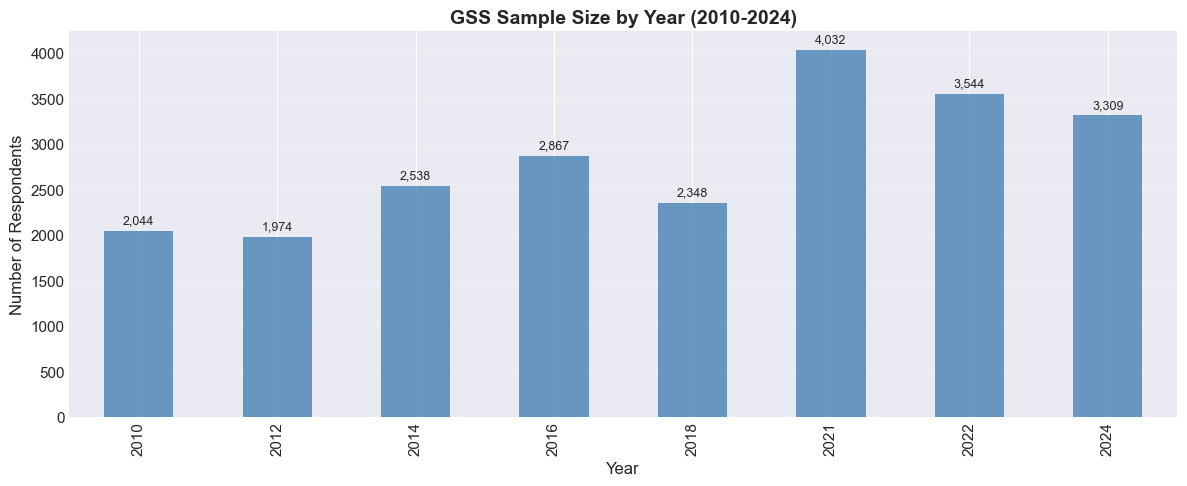

In [5]:
year_counts = df_raw['year'].value_counts().sort_index()

print("\n" + "="*80)
print("SAMPLE SIZE BY YEAR")
print("="*80)
print(year_counts)
print(f"\nTotal observations: {year_counts.sum():,}")

fig, ax = plt.subplots(figsize=(12, 5))
year_counts.plot(kind='bar', ax=ax, color='steelblue', alpha=0.8)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Respondents', fontsize=12)
ax.set_title('GSS Sample Size by Year (2010-2024)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(year_counts):
    ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Observations:**
- Highest recording: 2021
- Lowest recording: 2018
- Minimum sample: 1,974
- Maximum sample: 4,032
- Total: 22,656 respondents

## Variable Exploration

In this section, we examine each key variable for our analysis:
1. **Dependent Variable:** Political tolerance
2. **Mediator:** Social trust
3. **Independent Variable:** Urbanicity
4. **Controls:** Demographics and political characteristics

#### Dependent Variable: Political Tolerance

In [6]:
print("="*80)
print("POLITICAL TOLERANCE VARIABLES")
print("="*80)

tolerance_vars = [col for col in df_raw.columns if any(x in col.lower() 
                  for x in ['spk', 'lib', 'col'])]

print(f"Found {len(tolerance_vars)} tolerance-related variables:")
print(tolerance_vars)

POLITICAL TOLERANCE VARIABLES
Found 17 tolerance-related variables:
['spkath', 'colath', 'libath', 'spkrac', 'colrac', 'librac', 'spkcom', 'colcom', 'libcom', 'colmil', 'libmil', 'spkhomo', 'colhomo', 'libhomo', 'spkmslm', 'colmslm', 'libmslm']


In [7]:
sample_tolerance = ['spkath', 'libath', 'colath',  # Atheist
                    'spkrac', 'librac', 'colrac',  # Racist  
                    'spkcom', 'libcom', 'colcom']  # Communist

print("\n" + "="*80)
print("TOLERANCE VARIABLE DETAILS")
print("="*80)

for var in sample_tolerance:
    if var in df_raw.columns:
        print(f"\n{var.upper()}:")
        print(df_raw[var].value_counts(dropna=False).sort_index())
        print(f"Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")


TOLERANCE VARIABLE DETAILS

SPKATH:
.d:  Do not Know/Cannot Choose       78
.i:  Inapplicable                 11261
.n:  No answer                       22
.s:  Skipped on Web                  14
ALLOWED                            8934
NOT ALLOWED                        2347
Name: spkath, dtype: int64
Missing: 0 (0.0%)

LIBATH:
.d:  Do not Know/Cannot Choose      170
.i:  Inapplicable                 11261
.n:  No answer                       21
.s:  Skipped on Web                  16
NOT REMOVE                         8781
REMOVE                             2407
Name: libath, dtype: int64
Missing: 0 (0.0%)

COLATH:
.d:  Do not Know/Cannot Choose     290
.i:  Inapplicable                 7631
.n:  No answer                      38
.s:  Skipped on Web                 33
ALLOWED                           9709
NOT ALLOWED                       4955
Name: colath, dtype: int64
Missing: 0 (0.0%)

SPKRAC:
.d:  Do not Know/Cannot Choose      128
.i:  Inapplicable                 11261
.n:  No

**Tolerance Variable Coding:**
- ALLOWED = Allowed (tolerant response)
- NOT ALLOWED = Not allowed (intolerant response)
- DON'T KNOW
- NO ANSWER
- NOT APPLICABLE
- SKIPPED ON WEB


**Target Groups:**
- Atheists (spkath, libath, colath)
- Racists (spkrac, librac, colrac)
- Communists (spkcom, libcom, colcom)
- Militarists (spkmil, libmil, colmil)
- Homosexuals (spkhomo, libhomo, colhomo)
- Muslims (spkmslm, libmslm, colmslm)

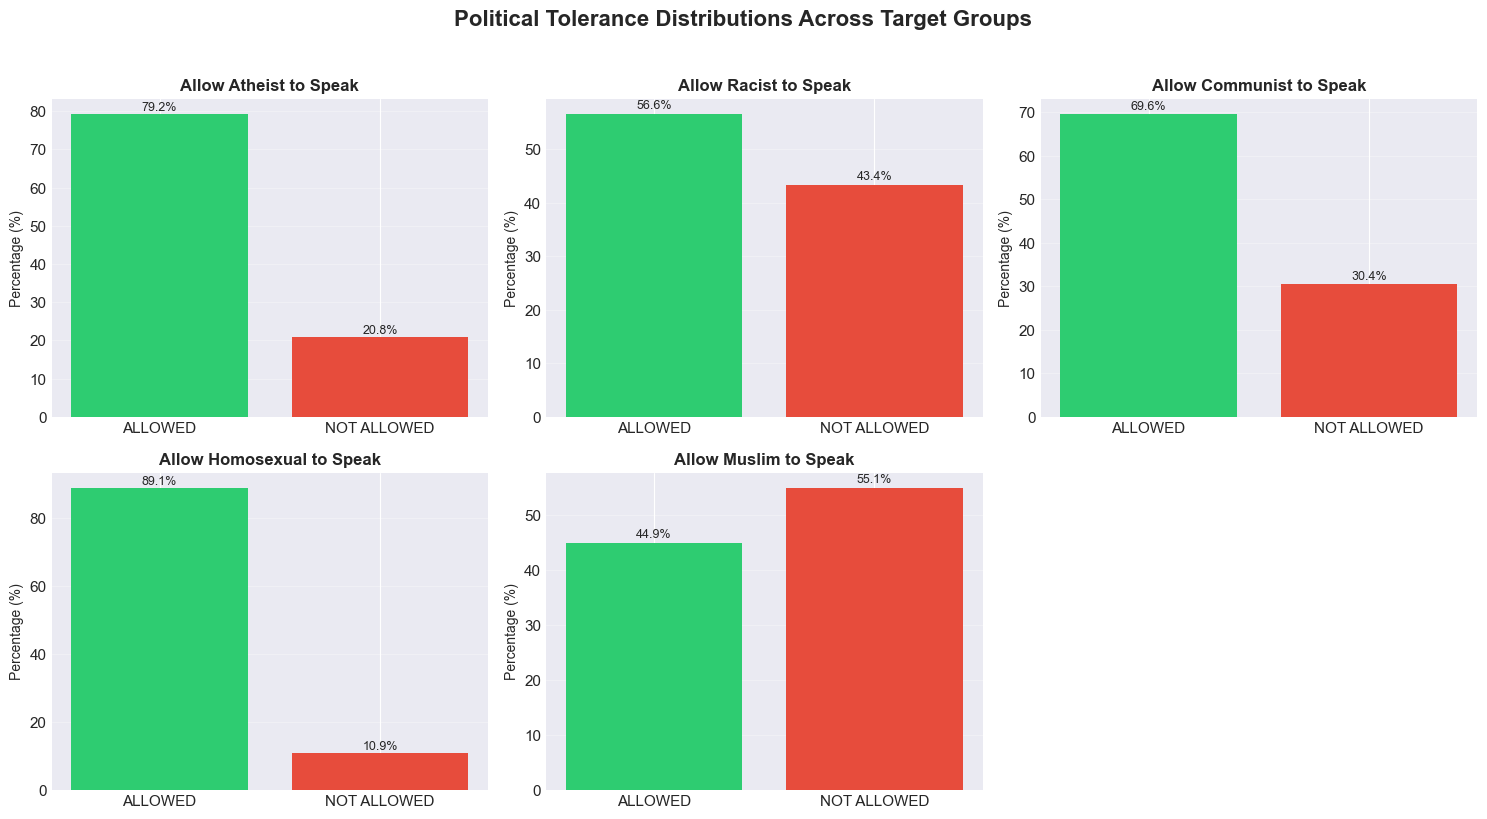

In [8]:
# Visualizing tolerance patterns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Political Tolerance Distributions Across Target Groups', 
             fontsize=16, fontweight='bold', y=1.02)

sample_vars = ['spkath', 'spkrac', 'spkcom', 'spkhomo', 'spkmslm']
target_labels = ['Atheist', 'Racist', 'Communist', 'Homosexual', 'Muslim']

# Define valid response values for each variable type
allowed_values = ['ALLOWED', 'Yes, allowed']
not_allowed_values = ['NOT ALLOWED', 'Not allowed']

for idx, (var, label) in enumerate(zip(sample_vars, target_labels)):
    ax = axes[idx // 3, idx % 3]
    
    if var in df_raw.columns:
        valid_data = df_raw[var][~df_raw[var].astype(str).str.startswith('.')]
        
        if len(valid_data) > 0:
            standardized = valid_data.replace({
                'ALLOWED': 'ALLOWED',
                'Yes, allowed': 'ALLOWED',
                'NOT ALLOWED': 'NOT ALLOWED',
                'Not allowed': 'NOT ALLOWED'
            })
        
            counts = standardized.value_counts(normalize=True) * 100
            
            allowed_pct = counts.get('ALLOWED', 0)
            not_allowed_pct = counts.get('NOT ALLOWED', 0)
            
            bars = ax.bar([0, 1], [allowed_pct, not_allowed_pct], 
                         color=['#2ecc71', '#e74c3c'])
            
            ax.set_title(f'Allow {label} to Speak', fontsize=12, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Percentage (%)', fontsize=10)
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['ALLOWED', 'NOT ALLOWED'], rotation=0)
            ax.grid(axis='y', alpha=0.3)
            
            # Add percentage labels
            ax.text(0, allowed_pct + 1, f'{allowed_pct:.1f}%', ha='center', fontsize=9)
            ax.text(1, not_allowed_pct + 1, f'{not_allowed_pct:.1f}%', ha='center', fontsize=9)
        else:
            ax.text(0.5, 0.5, 'No valid data', ha='center', va='center')
            ax.set_xticks([])
            ax.set_yticks([])
    else:
        ax.text(0.5, 0.5, f'{var} not found', ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])

# Hide the 6th subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

**Key Observations:**
- Group that faces most tolerance: Homosexuals
- Group that faces least tolerance: Musim
- Note that missing and null variables are excluded.
- TO DO: Check years and correlate it to news.

#### Mediator: Social Trust

In [9]:
print("="*80)
print("SOCIAL TRUST VARIABLES")
print("="*80)

trust_vars = ['trust', 'helpful', 'fair']

for var in trust_vars:
    if var in df_raw.columns:
        print(f"\n{var.upper()}:")
        print(df_raw[var].value_counts(dropna=False).sort_index())
        print(f"Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")
    else:
        print(f"\n{var.upper()}: NOT FOUND IN DATASET")

SOCIAL TRUST VARIABLES

TRUST:
.d:  Do not Know/Cannot Choose       33
.i:  Inapplicable                  8528
.n:  No answer                       10
.y:  Not available in this year    4032
Can't be too careful               6409
Depends                             579
Most people can be trusted         3065
Name: trust, dtype: int64
Missing: 0 (0.0%)

HELPFUL:
.d:  Do not Know/Cannot Choose       54
.i:  Inapplicable                  8528
.n:  No answer                       10
.s:  Skipped on Web                   1
.y:  Not available in this year    4032
Depends                             943
Looking out for themselves         4517
Try to be helpful                  4571
Name: helpful, dtype: int64
Missing: 0 (0.0%)

FAIR:
.d:  Do not Know/Cannot Choose       78
.i:  Inapplicable                  8528
.n:  No answer                       11
.y:  Not available in this year    4032
Depends                             795
Would take advantage of you        4217
Would try to be fair  

**Trust Variable Coding:**
- **TRUST:** "Generally speaking, would you say that most people can be trusted or that you can't be too careful in dealing with people?"
  - 1 = Can trust
  - 2 = Can't be too careful
  - 3 = Depends

- **HELPFUL:** "Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves?"
  - 1 = Try to be helpful
  - 2 = Just look out for themselves
  - 3 = Depends

- **FAIR:** "Do you think most people would try to take advantage of you if they got a chance, or would they try to be fair?"
  - 1 = Would take advantage of you
  - 2 = Would try to be fair
  - 3 = Depends

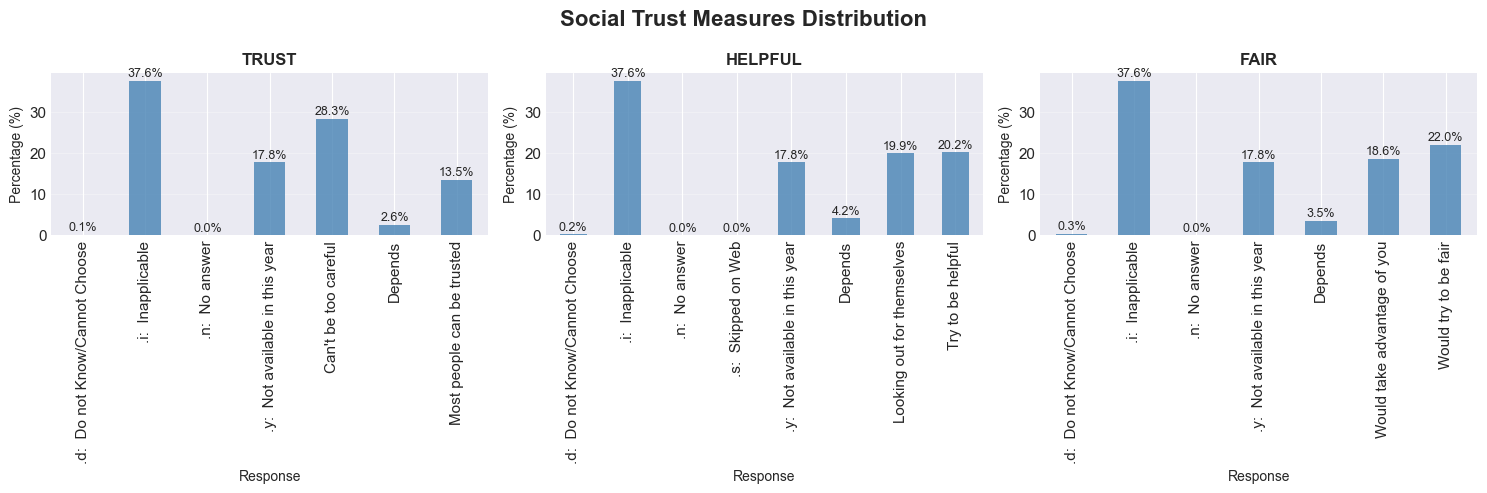

In [10]:
# Visualizing trust distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Social Trust Measures Distribution', fontsize=16, fontweight='bold')

for idx, var in enumerate(trust_vars):
    if var in df_raw.columns:
        counts = df_raw[var].value_counts(normalize=True).sort_index() * 100
        
        counts.plot(kind='bar', ax=axes[idx], color='steelblue', alpha=0.8)
        axes[idx].set_title(f'{var.upper()}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Response', fontsize=10)
        axes[idx].set_ylabel('Percentage (%)', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)
        
        for i, v in enumerate(counts):
            axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

**Key Observations:**
- A lot of people decided to choose 'Inapplicable'. Why? Comfortability?
- (Aside from 'Inapplicable'), people can't be too careful and say thet must look out for themselves. Not much trust.
- TO DO: (During cleaning process), exclude and take note of missing values (unavailable some particular years) 

#### Independent Variable: Urbanicity

In [11]:
print("="*80)
print("URBANICITY VARIABLES")
print("="*80)

urbanicity_vars = ['xnorcsiz', 'srcbelt']

for var in urbanicity_vars:
    if var in df_raw.columns:
        print(f"\n{var.upper()}:")
        print(df_raw[var].value_counts(dropna=False).sort_index())
        print(f"Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")
    else:
        print(f"\n{var.upper()}: NOT FOUND IN DATASET")

URBANICITY VARIABLES

XNORCSIZ:
A large central city (over 250,000)                                                 4164
A medium size central city (50,000 to 250,000)                                      2849
A suburb of a large central city                                                    5398
A suburb of a medium size central city                                              3019
A town or village (2,500 to 9,999)                                                   839
An incorporated area less than 2,500 or an unincorporated area of 1,000 to 2,499     386
An unincorporated area of a large central city (division, township, etc.)           1974
An unincorporated area of a medium central city                                     1833
Not within an smsa, (within a county) and a small city (10,000 to 49,999)            733
Open country within larger civil divisions (division, township, etc.)               1461
Name: xnorcsiz, dtype: int64
Missing: 0 (0.0%)

SRCBELT:
.i:  Inapplicable    

**Urbanicity Variable Coding:**

**XNORCSIZ** (Extended NORC Size Code):
1. A large central city (over 250,000) 
2. A medium size central city (50,000 to 250,000)3-100 largest SMSAs
3. A suburb of a large central city  
4. A suburb of a medium size central city
5. A town or village (2,500 to 9,999) 
6. An incorporated area less than 2,500 or an unincorporated area of 1,000 to 2,499
7. An unincorporated area of a large central city (division, township, etc.)
8. Not within an smsa, (within a county) and a small city (10,000 to 49,999)  
9. Open country within larger civil divisions (division, township, etc.) 

**SRCBELT** (Source Belt Code):
1. Central city, 12 largest SMSAs
2. Central city, 13-100 largest SMSAs
3. Suburbs, 12 largest SMSAs
4. Suburbs, 13-100 largest SMSAs
5. Other urban
6. Other rural
7. Suburbs of 12 largest SMSAS
8. Suburbs of the remaining 100 largest SMSAS

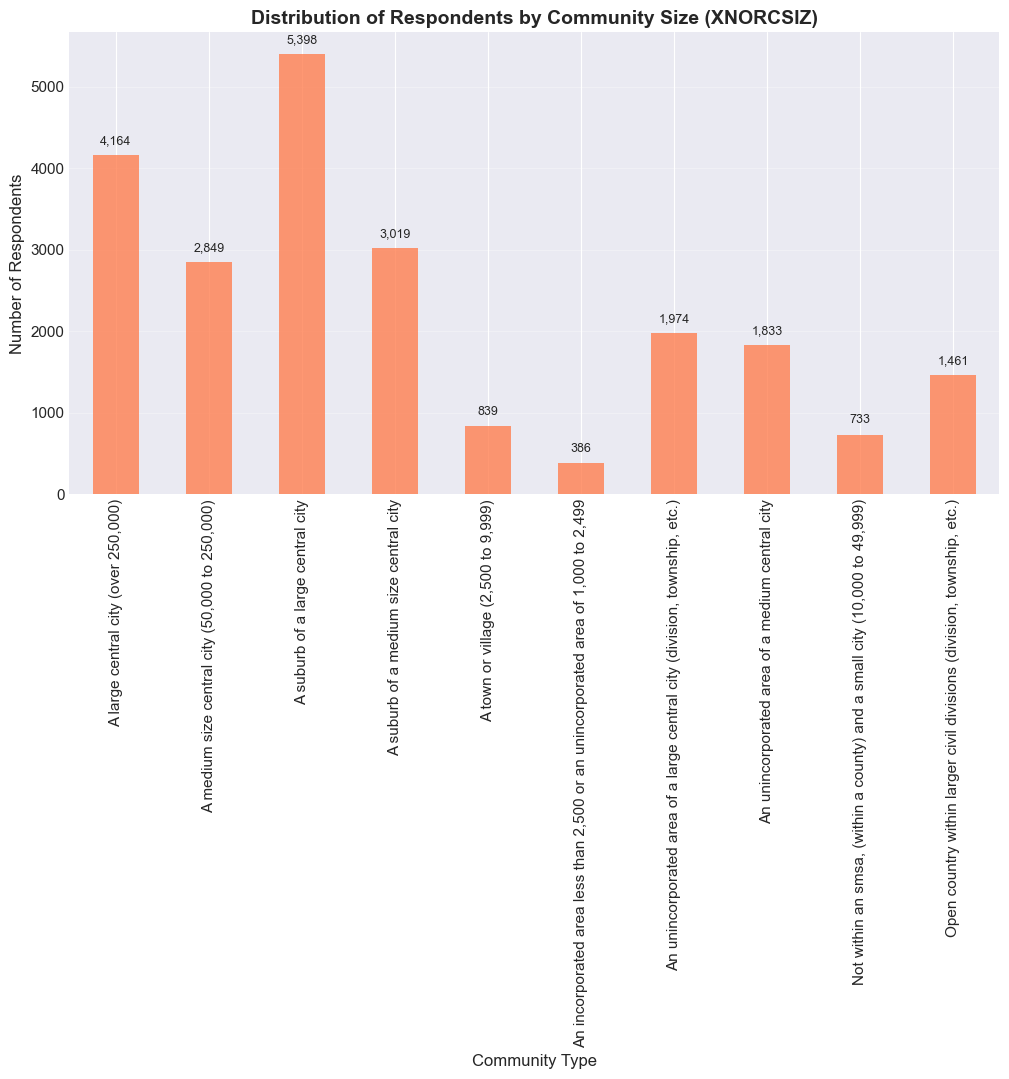

In [14]:
# Visualizing urbanicity distribution
if 'xnorcsiz' in df_raw.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    counts = df_raw['xnorcsiz'].value_counts().sort_index()
    counts.plot(kind='bar', ax=ax, color='coral', alpha=0.8)
    
    ax.set_title('Distribution of Respondents by Community Size (XNORCSIZ)', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Community Type', fontsize=12)
    ax.set_ylabel('Number of Respondents', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(counts):
        ax.text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

**Key Observations:**
- Distribution across urban/suburban/rural areas
- TO DO: visalize SRCBELT too

#### Control Variables

In [15]:
print("="*80)
print("CONTROL VARIABLES")
print("="*80)

control_vars = {
    'age': 'Age in years',
    'sex': 'Sex (1=Male, 2=Female)',
    'race': 'Race',
    'hispanic': 'Hispanic ethnicity',
    'educ': 'Years of education',
    'degree': 'Highest degree',
    'income': 'Family income',
    'realinc': 'Family income (inflation-adjusted)',
    'polviews': 'Political views (1=Very liberal to 7=Very conservative)',
    'partyid': 'Party identification',
    'region': 'Geographic region'
}

for var, description in control_vars.items():
    if var in df_raw.columns:
        print(f"\n{var.upper()}: {description}")
        print(f"  Type: {df_raw[var].dtype}")
        print(f"  Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")
        print(f"  Unique values: {df_raw[var].nunique()}")
        
        if df_raw[var].nunique() <= 20:  # Show value counts for categorical
            print(f"  Distribution:")
            print(df_raw[var].value_counts().sort_index())
        else:  # Show summary stats for continuous
            print(f"  Summary statistics:")
            print(df_raw[var].describe())

CONTROL VARIABLES

AGE: Age in years
  Type: object
  Missing: 0 (0.0%)
  Unique values: 74
  Summary statistics:
count              22656
unique                74
top       .n:  No answer
freq                 450
Name: age, dtype: object

SEX: Sex (1=Male, 2=Female)
  Type: object
  Missing: 0 (0.0%)
  Unique values: 6
  Distribution:
.d:  Do not Know/Cannot Choose       15
.i:  Inapplicable                    19
.n:  No answer                       81
.s:  Skipped on Web                  16
FEMALE                            12450
MALE                              10075
Name: sex, dtype: int64

RACE: Race
  Type: object
  Missing: 0 (0.0%)
  Unique values: 4
  Distribution:
.i:  Inapplicable      172
Black                 3473
Other                 2397
White                16614
Name: race, dtype: int64

HISPANIC: Hispanic ethnicity
  Type: object
  Missing: 0 (0.0%)
  Unique values: 9
  Distribution:
.d:  Do not Know/Cannot Choose                    40
.i:  Inapplicable             

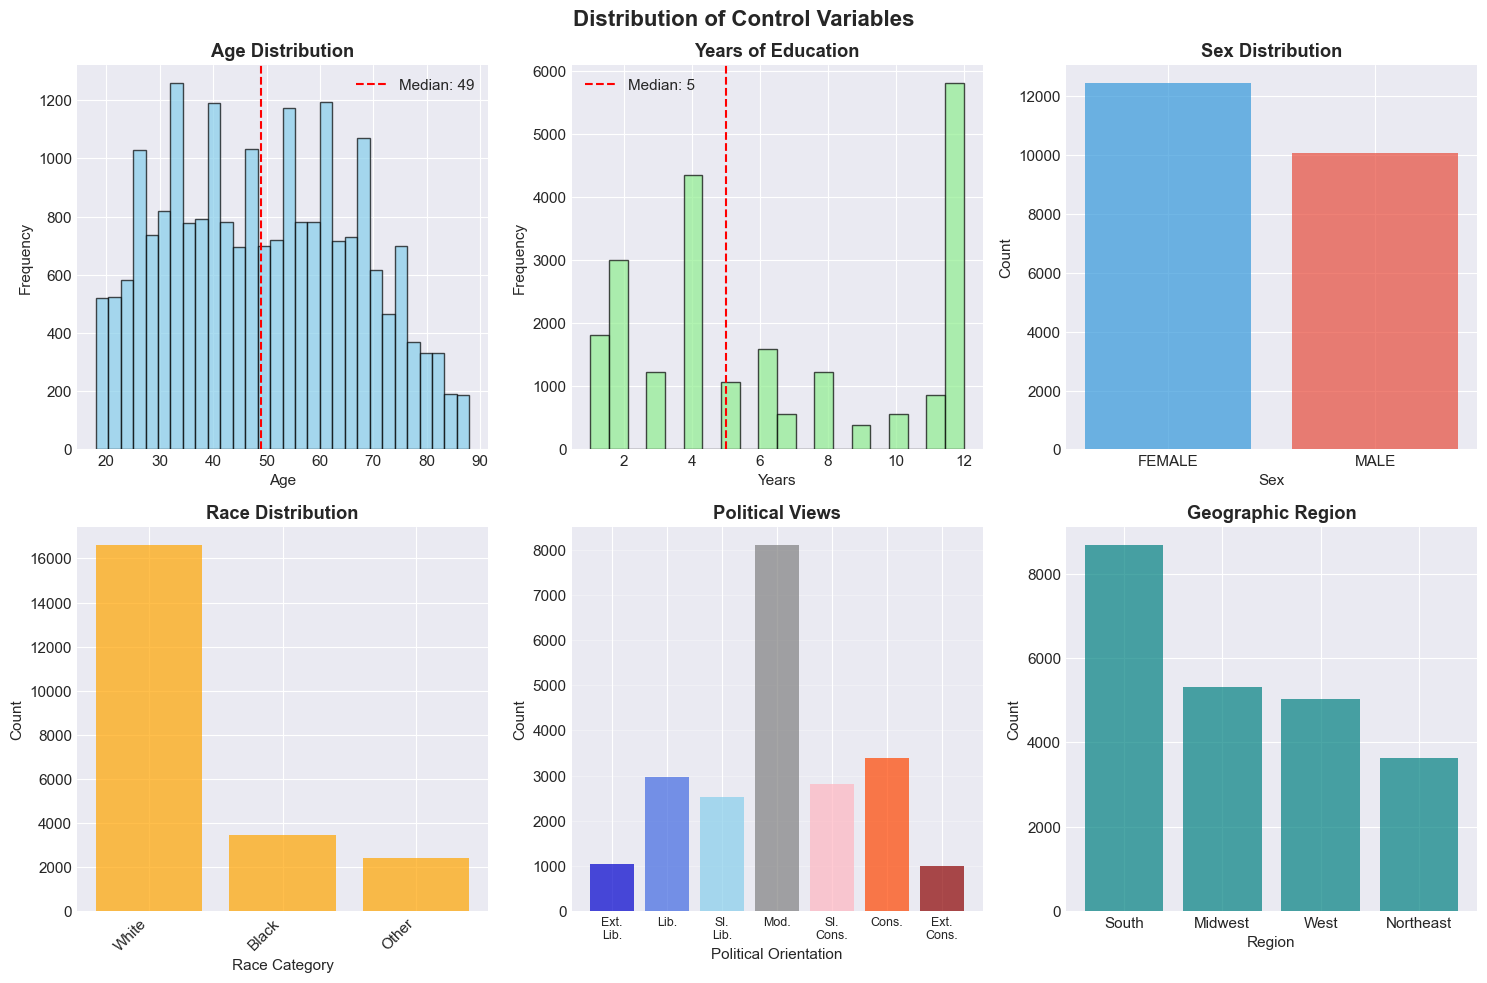

In [24]:
# Visualizing controls
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Control Variables', fontsize=16, fontweight='bold')

# Age
if 'age' in df_raw.columns:
    age_valid = df_raw['age'][~df_raw['age'].astype(str).str.startswith('.')]
    age_numeric = pd.to_numeric(age_valid, errors='coerce').dropna()
    axes[0, 0].hist(age_numeric, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Age Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(age_numeric.median(), color='red', linestyle='--', 
                       label=f'Median: {age_numeric.median():.0f}')
    axes[0, 0].legend()

# Education
if 'educ' in df_raw.columns:
    educ_valid = df_raw['educ'][~df_raw['educ'].astype(str).str.startswith('.')]
    # Extract numeric part from strings like "12th grade", "16 years", etc.
    educ_numeric = pd.to_numeric(educ_valid.str.extract(r'(\d+)')[0], errors='coerce').dropna()
    axes[0, 1].hist(educ_numeric, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Years of Education', fontweight='bold')
    axes[0, 1].set_xlabel('Years')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(educ_numeric.median(), color='red', linestyle='--',
                       label=f'Median: {educ_numeric.median():.0f}')
    axes[0, 1].legend()

# Sex
if 'sex' in df_raw.columns:
    sex_valid = df_raw['sex'][~df_raw['sex'].astype(str).str.startswith('.')]
    sex_counts = sex_valid.value_counts()
    axes[0, 2].bar(range(len(sex_counts)), sex_counts.values, color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[0, 2].set_title('Sex Distribution', fontweight='bold')
    axes[0, 2].set_xlabel('Sex')
    axes[0, 2].set_ylabel('Count')
    axes[0, 2].set_xticks(range(len(sex_counts)))
    axes[0, 2].set_xticklabels(sex_counts.index, rotation=0)

# Race
if 'race' in df_raw.columns:
    race_valid = df_raw['race'][~df_raw['race'].astype(str).str.startswith('.')]
    race_counts = race_valid.value_counts()
    axes[1, 0].bar(range(len(race_counts)), race_counts.values, color='orange', alpha=0.7)
    axes[1, 0].set_title('Race Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('Race Category')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xticks(range(len(race_counts)))
    axes[1, 0].set_xticklabels(race_counts.index, rotation=45, ha='right')

# Political Views
if 'polviews' in df_raw.columns:
    polviews_valid = df_raw['polviews'][~df_raw['polviews'].astype(str).str.startswith('.')]
    polviews_counts = polviews_valid.value_counts()
    
    # Order by political spectrum (liberal to conservative)
    polviews_order = ['Extremely liberal', 'Liberal', 'Slightly liberal', 
                      'Moderate, middle of the road', 'Slightly conservative', 
                      'Conservative', 'Extremely conservative']
    polviews_ordered = polviews_counts.reindex([p for p in polviews_order if p in polviews_counts.index])
    
    # Create gradient color from blue (liberal) to red (conservative)
    colors_gradient = ['#0000CC', '#4169E1', '#87CEEB', '#808080', '#FFB6C1', '#FF4500', '#8B0000']
    
    axes[1, 1].bar(range(len(polviews_ordered)), polviews_ordered.values, 
                   color=colors_gradient[:len(polviews_ordered)], alpha=0.7)
    axes[1, 1].set_title('Political Views', fontweight='bold')
    axes[1, 1].set_xlabel('Political Orientation')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_xticks(range(len(polviews_ordered)))
    axes[1, 1].set_xticklabels(['Ext.\nLib.', 'Lib.', 'Sl.\nLib.', 'Mod.', 
                                 'Sl.\nCons.', 'Cons.', 'Ext.\nCons.'], 
                                fontsize=9)
    axes[1, 1].grid(axis='y', alpha=0.3)

# Region
if 'region' in df_raw.columns:
    region_counts = df_raw['region'].value_counts()
    axes[1, 2].bar(range(len(region_counts)), region_counts.values, color='teal', alpha=0.7)
    axes[1, 2].set_title('Geographic Region', fontweight='bold')
    axes[1, 2].set_xlabel('Region')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].set_xticks(range(len(region_counts)))
    axes[1, 2].set_xticklabels(region_counts.index, rotation=0)

plt.tight_layout()
plt.show()

#### Missing Data Analysis

In [17]:
print("="*80)
print("MISSING DATA ANALYSIS")
print("="*80)

# Calculate missing percentages
missing_data = pd.DataFrame({
    'Variable': df_raw.columns,
    'Missing_Count': df_raw.isna().sum(),
    'Missing_Percent': (df_raw.isna().sum() / len(df_raw) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percent', ascending=False
)

print(f"\nVariables with missing data: {len(missing_data)}/{len(df_raw.columns)}")
print(f"\nTop 20 variables with most missing data:")
print(missing_data.head(20).to_string(index=False))

MISSING DATA ANALYSIS

Variables with missing data: 0/38

Top 20 variables with most missing data:
Empty DataFrame
Columns: [Variable, Missing_Count, Missing_Percent]
Index: []


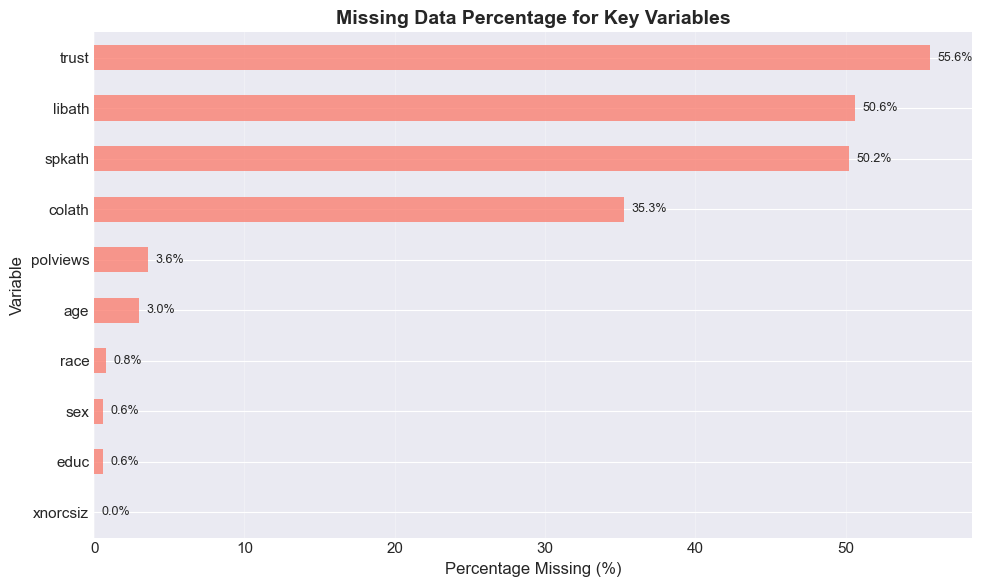

In [18]:
# Visualize missing data for key variables
key_vars = ['trust', 'spkath', 'libath', 'colath', 'xnorcsiz', 
            'age', 'educ', 'sex', 'race', 'polviews']
key_vars_present = [v for v in key_vars if v in df_raw.columns]

# Calculate missing percentage (including codes starting with '.')
missing_percentages = []
for v in key_vars_present:
    # Count both NaN and values starting with '.'
    missing_count = df_raw[v].isna().sum() + df_raw[v].astype(str).str.startswith('.').sum()
    missing_percent = (missing_count / len(df_raw)) * 100
    missing_percentages.append(missing_percent)

missing_key = pd.DataFrame({
    'Variable': key_vars_present,
    'Missing_Percent': missing_percentages
})

fig, ax = plt.subplots(figsize=(10, 6))
missing_sorted = missing_key.sort_values('Missing_Percent', ascending=True)
missing_sorted.plot(
    x='Variable', y='Missing_Percent', kind='barh', ax=ax, 
    color='salmon', alpha=0.8, legend=False
)
ax.set_title('Missing Data Percentage for Key Variables', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage Missing (%)', fontsize=12)
ax.set_ylabel('Variable', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(missing_sorted['Missing_Percent']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

**Missing Data Strategy:**

Based on the exploration:
1. **Trust variable:** 55.6% missing - manageable with listwise deletion
2. **Tolerance variables:** [X]% missing - will create index, require valid responses
3. **Urbanicity:** 0% missing - critical variable, investigate patterns
4. **Controls:** Variable patterns - will use listwise deletion for main analysis

**Next steps:**
- Investigate whether data is missing completely at random (MCAR)
- Consider sensitivity analysis with imputation
- Document final sample size after cleaning

## Data Quality Checks

#### Unusal Values and Outliers

In [44]:
print("="*80)
print("DATA QUALITY CHECKS")
print("="*80)

# Check age for outliers
if 'age' in df_raw.columns:
    print("\nAGE DISTRIBUTION:")
    # Filter out missing codes and convert to numeric
    age_valid = df_raw['age'][~df_raw['age'].astype(str).str.startswith('.')]
    age_numeric = pd.to_numeric(age_valid, errors='coerce').dropna()
    
    print(age_numeric.describe())
    print(f"Total valid age values: {len(age_numeric)}")
    print(f"Values above 100: {(age_numeric > 100).sum()}")
    print(f"Values below 18: {(age_numeric < 18).sum()}")
    print(f"Missing/invalid values: {len(df_raw) - len(age_numeric)}")

# Check education for unusual values
if 'educ' in df_raw.columns:
    print("\nEDUCATION DISTRIBUTION:")
    # Filter out missing codes and convert to numeric
    educ_valid = df_raw['educ'][~df_raw['educ'].astype(str).str.startswith('.')]
    # Extract numeric years from education strings
    educ_numeric = pd.to_numeric(educ_valid.str.extract(r'(\d+)')[0], errors='coerce').dropna()
    
    print(educ_numeric.describe())
    print(f"Total valid education values: {len(educ_numeric)}")
    print(f"Values above 20: {(educ_numeric > 20).sum()}")
    print(f"Values below 0: {(educ_numeric < 0).sum()}")
    print(f"Missing/invalid values: {len(df_raw) - len(educ_numeric)}")

# Check for duplicate IDs
if 'id' in df_raw.columns:
    duplicates = df_raw['id'].duplicated().sum()
    print(f"\nDuplicate IDs: {duplicates}")
    if duplicates > 0:
        print("Warning: Duplicate IDs found - investigate!")
else:
    print("\nID column not found in dataset")

# Additional data quality checks
print("\n" + "="*80)
print("TOLERANCE VARIABLES CHECK")
print("="*80)

tolerance_vars = ['spkath', 'spkrac', 'spkcom', 'spkhomo', 'spkmslm',
                  'libath', 'librac', 'libcom', 'libhomo', 'libmslm',
                  'colath', 'colrac', 'colcom', 'colhomo', 'colmslm']

for var in tolerance_vars:
    if var in df_raw.columns:
        # Count valid responses (not starting with '.')
        valid_count = (~df_raw[var].astype(str).str.startswith('.')).sum()
        missing_count = df_raw[var].astype(str).str.startswith('.').sum()
        print(f"{var:10s}: Valid={valid_count:5d}, Missing={missing_count:5d}, "
              f"Missing %={missing_count/len(df_raw)*100:5.1f}%")

DATA QUALITY CHECKS

AGE DISTRIBUTION:
count   21802.00
mean       49.29
std        17.44
min        18.00
25%        34.00
50%        49.00
75%        63.00
max        88.00
Name: age, dtype: float64
Total valid age values: 21802
Values above 100: 0
Values below 18: 0
Missing/invalid values: 854

EDUCATION DISTRIBUTION:
count   22481.00
mean        6.49
std         4.03
min         1.00
25%         3.00
50%         5.00
75%        12.00
max        12.00
Name: 0, dtype: float64
Total valid education values: 22481
Values above 20: 0
Values below 0: 0
Missing/invalid values: 175

ID column not found in dataset

TOLERANCE VARIABLES CHECK
spkath    : Valid=11281, Missing=11375, Missing %= 50.2%
spkrac    : Valid=11210, Missing=11446, Missing %= 50.5%
spkcom    : Valid=11027, Missing=11629, Missing %= 51.3%
spkhomo   : Valid= 8946, Missing=13710, Missing %= 60.5%
spkmslm   : Valid=11208, Missing=11448, Missing %= 50.5%
libath    : Valid=11188, Missing=11468, Missing %= 50.6%
librac    : Val

#### Logical Consistency Checks

In [45]:
# Example: Check if tolerance responses are coded correctly
tolerance_sample = ['spkath', 'libath', 'colath']

for var in tolerance_sample:
    if var in df_raw.columns:
        unique_vals = df_raw[var].dropna().unique()
        print(f"\n{var} unique values: {sorted(unique_vals)}")
        
        # Check for unexpected values
        expected = [1, 2]
        unexpected = [v for v in unique_vals if v not in expected]
        if unexpected:
            print(f"  ⚠️ Unexpected values found: {unexpected}")


spkath unique values: ['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable', '.n:  No answer', '.s:  Skipped on Web', 'ALLOWED', 'NOT ALLOWED']
  ⚠️ Unexpected values found: ['.i:  Inapplicable', 'ALLOWED', 'NOT ALLOWED', '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.s:  Skipped on Web']

libath unique values: ['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable', '.n:  No answer', '.s:  Skipped on Web', 'NOT REMOVE', 'REMOVE']
  ⚠️ Unexpected values found: ['.i:  Inapplicable', '.d:  Do not Know/Cannot Choose', 'NOT REMOVE', 'REMOVE', '.n:  No answer', '.s:  Skipped on Web']

colath unique values: ['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable', '.n:  No answer', '.s:  Skipped on Web', 'ALLOWED', 'NOT ALLOWED']
  ⚠️ Unexpected values found: ['.i:  Inapplicable', 'NOT ALLOWED', 'ALLOWED', '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.s:  Skipped on Web']
